Key insights:

1. The data has been collected by the scientists from the University of Dayton (Ohio) in the USA. This resulted in specyfing the temperatures for the major cities for each of the states, hence the presence of the 'State' column that contains no values for any other country apart from the USA. Therefore, it has not been taken into consideration during the final stage of the data analysis.
2. The selected dataset does not contain the data related to all the countries across the globe (36%, 70 countries missing). This may have been caused by the inability/lack of resources to record the values of the temperatures, political circumstances or intentional exclusion.
3. Travel agents could use the information based on the processed data to predict and adjust their offers for summer holiday in Bucharest given the higher certainty of warm weather forecasts.
4. The comparative analysis between Warsaw and Ireland clearly demonstrates the differences in the average monthly temperatures related to the geographical location (East v West Europe). One may choose for a festive Christmas break-away trip in Warsaw due to more desirable forecast reliability for snow/lower winter temperatures.
5. After proper pre-processing, visualisation of the data as well as incorporation of machine learning techniques would potentialy be possible to determine the trend in the rising global temperature as shown in the graph included in the comparative analysis between Dublin and Warsaw - subtle uptake in the average values.

In [1]:
# Importing necessary libraries that will be used throughout the project:
# a) pandas for data frame operations and reading the file, 
# b) numpy for mathematical operations on arrays,
# c) matplotlib for selected visualisations of pre-processed data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading/loading an already downloaded dataset (.csv format) from the Kaggle website into pandas data frame
# URL: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities/download?datasetVersionNumber=1

df = pd.read_csv('city_temperature.csv')

C:\Users\markp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Displaying the first 5 rows of created data frame for explorational purposes (values/columns)

df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [31]:
# Displaying the last 5 rows of created data frame for explorational purposes (values/columns)

df.tail()

,Region,Country,City,Month,Day,Year,AvgTemperature
2906322,North America,US,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,San Juan Puerto Rico,7,31,2013,83.6


In [4]:
# Demonstration of the data types representing the columns of created data frame

df.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [5]:
# Summary of the data frame for object-type values
# Missing values noted for the 'State' column, because of the administration division of the USA

df.describe(include=object)

,Region,Country,State,City
count,2906327,2906327,1455337,2906327
unique,7,125,52,321
top,North America,US,Texas,Springfield
freq,1556681,1455337,129711,18530


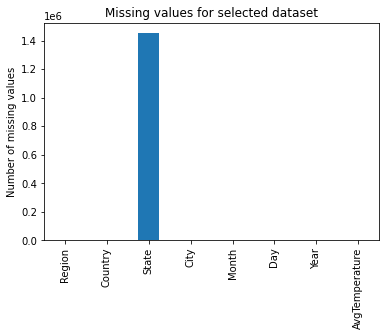

In [6]:
# Specyfing the number of missing values for each column of the created data frame with bar-plot for visualisation

missing = pd.DataFrame(df.isnull().sum())
missing_plot = missing.plot.bar(ylabel = 'Number of missing values', title = 'Missing values for selected dataset', legend = 0)

In [7]:
# 'State' column deemed unnecessary for further analysis - subsequently dropped from the main data frame

df.drop('State', axis = 1, inplace = True)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [34]:
# Specyfing the unique values for the 'City' column of main data frame and convering the newly created data frame into a list

cities = df['City'].unique()
cities = cities.tolist()
cities

['Algiers',
 'Bujumbura',
 'Cotonou',
 'Bangui',
 'Brazzaville',
 'Cairo',
 'Addis Ababa',
 'Libreville',
 'Banjul',
 'Conakry',
 'Bissau',
 'Abidjan',
 'Nairobi',
 'Rabat',
 'Antananarivo',
 'Nouakchott',
 'Lilongwe',
 'Maputo',
 'Windhoek',
 'Niamey',
 'Lagos',
 'Dakar',
 'Freetown',
 'Capetown',
 'Lome',
 'Tunis',
 'Dar Es Salaam',
 'Kampala',
 'Lusaka',
 'Dhaka',
 'Beijing',
 'Chengdu',
 'Guangzhou',
 'Shanghai',
 'Shenyang',
 'Hong Kong',
 'Bombay (Mumbai)',
 'Calcutta',
 'Chennai (Madras)',
 'Delhi',
 'Jakarta',
 'Osaka',
 'Sapporo',
 'Tokyo',
 'Almaty',
 'Bishkek',
 'Vientiane',
 'Kuala Lumpur',
 'Ulan-bator',
 'Rangoon',
 'Katmandu',
 'Pyongyang',
 'Islamabad',
 'Karachi',
 'Manila',
 'Singapore',
 'Seoul',
 'Colombo',
 'Taipei',
 'Dusanbe',
 'Bangkok',
 'Ashabad',
 'Tashkent',
 'Hanoi',
 'Brisbane',
 'Canberra',
 'Melbourne',
 'Perth',
 'Sydney',
 'Auckland',
 'Tirana',
 'Vienna',
 'Minsk',
 'Brussels',
 'Sofia',
 'Zagreb',
 'Nicosia',
 'Prague',
 'Copenhagen',
 'Helsinki',
 '

In [33]:
# Counting the number of unique entries in the list

len(cities)

321

In [10]:
# Creating a new data frame containing the data relating to 'Bucharest' from the 'City' column only

bucharest = df.loc[df['City'] == 'Bucharest']

In [11]:
# Grouping the data contained within the 'bucharest' data frame
# Goal is to obtain the average monthly temperature for a particular month in a particular year

bucharest = bucharest.groupby(['Year', 'Month']).agg({'AvgTemperature': ['mean']})
bucharest.columns = ['Avg_temp_F']
bucharest.reset_index()

,Year,Month,Avg_temp_F
0,1995,1,27.970968
1,1995,2,40.907143
2,1995,3,42.996774
3,1995,4,52.383333
4,1995,5,59.977419
...,...,...,...
300,2020,1,33.725806
301,2020,2,41.031034
302,2020,3,47.796774
303,2020,4,54.060000


In [12]:
# Creating a data array from 'Avg_temp_F' column of the 'bucharest' data frame in order to utilise the numpy library

numpy_bucharest = bucharest['Avg_temp_F'].values

In [13]:
# Statistical analysis of the selected array including mean, standard deviation, maximum, and minimum values

mean = np.mean(numpy_bucharest)
std = np.std(numpy_bucharest)
maximum = np.max(numpy_bucharest)
minimum = np.min(numpy_bucharest)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Maximum value:", maximum)
print("Minimum value:", minimum)

Mean: 52.29847200224206
Standard Deviation: 16.19710903195011
Maximum value: 80.53548387096774
Minimum value: 10.08387096774193


In [14]:
# Creating a new data frame with columns 'Region' and 'Country' only

dictionary_df = df[['Region', 'Country']].copy()

In [15]:
# Dropping the duplicates within the data frame

dictionary_df.drop_duplicates(inplace=True)
dictionary_df.head()

In [17]:
# Creating an empty dictionary to be filled with the key-value data obtained from the 'dictionary_df'

dictionary = {}

In [18]:
# 'For' loop containing 'if/else' conditional statements created for the purpose of populating the created dictionary with data
# Key-value data relates to a particular continent and cities contained within each of the continents

for _, row in dictionary_df.iterrows():
    continent = row['Region']
    country = row['Country']
    
    if continent in dictionary:
        dictionary[continent].append(country)
    else:
        dictionary[continent] = [country]

In [19]:
# Demonstrated of the created dictionary

print(dictionary)

{'Africa': ['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo', 'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania', 'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal', 'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania', 'Uganda', 'Zambia'], 'Asia': ['Bangladesh', 'China', 'Hong Kong', 'India', 'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Vietnam'], 'Australia/South Pacific': ['Australia', 'New Zealand'], 'Europe': ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Macedonia', 'The Netherlands', 'Norway', 'Po

In [20]:
# Creating a custom function 'pick_city' with 2 arguments - data frame from which we are getting the data and city we want
# 1. Create a new data frame for a specific city
# 2. Drop columns 'Region' and 'Country' from the created data frame
# 3. Group the data to calculate the average monthly temperature for the selected city
# 4. Take the 'Avg_temp_F' column containing temperature in Fahrenheit and create a new column 'Avg_temp_C' - Celsius
# 5. Return the newly created data frame after all the aforementioned calculations

def pick_city(dataframe, city):
    
    df_selected = dataframe.loc[dataframe['City'] == str(city)] #1
    
    df_selected.drop(['Region', 'Country'], axis=1, inplace=True) #2
    
    df_selected = df_selected.groupby(['City', 'Year', 'Month']).agg({'AvgTemperature': ['mean']}) #3
    
    df_selected.columns = ['Avg_temp_F']
    df_selected['Avg_temp_C'] = ((df_selected['Avg_temp_F']-32)*(5/9))
    df_selected.reset_index() #4
    
    return df_selected #5

In [21]:
# Using the created 'pick_city' function to create data frames ('dublin' and 'warsaw') containing the data for selected cities

dublin = pick_city(df, 'Dublin')
warsaw = pick_city(df, 'Warsaw')

C:\Users\markp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
# Visualisation of the first 5 rows of the 'dublin' data frame

dublin.head()

Avg_temp_F  Avg_temp_C
City   Year Month                        
Dublin 1995 1       40.806452    4.892473
            2       42.710714    5.950397
            3       41.293548    5.163082
            4       47.020000    8.344444
            5       50.403226   10.224014

In [23]:
# Summary of the 'dublin' data frame for the columns containing temperature values

dublin.describe()

,Avg_temp_F,Avg_temp_C
count,305.000000,305.000000
mean,49.026308,9.459060
std,7.264185,4.035658
min,24.761290,-4.021505
25%,43.148387,6.193548
50%,48.066667,8.925926
75%,55.686667,13.159259
max,63.177419,17.320789


<AxesSubplot:title={'center':'Average monthly temperatures - Dublin'}, xlabel='Date', ylabel='Average monthly temperature [C]'>

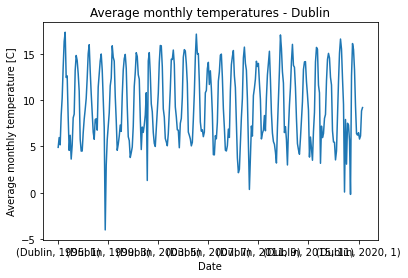

In [24]:
# Visualisation of the time series with average monthly temperatures for Dublin (line plot)

dublin.plot(y = 'Avg_temp_C', xlabel = 'Date', ylabel = 'Average monthly temperature [C]', title = 'Average monthly temperatures - Dublin', legend = False)

In [25]:
# Visualisation of the first 5 rows of the 'warsaw' data frame

warsaw.head()

Avg_temp_F  Avg_temp_C
City   Year Month                        
Warsaw 1995 1       28.883871   -1.731183
            2       37.685714    3.158730
            3       37.345161    2.969534
            4       46.106667    7.837037
            5       54.838710   12.688172

In [26]:
# Summary of the 'warsaw' data frame for the columns containing temperature values

warsaw.describe()

,Avg_temp_F,Avg_temp_C
count,305.000000,305.000000
mean,47.704878,8.724932
std,14.440550,8.022528
min,11.458065,-11.412186
25%,35.958065,2.198925
50%,47.756667,8.753704
75%,60.450000,15.805556
max,74.422581,23.568100


<AxesSubplot:title={'center':'Average monthly temperatures - Warsaw'}, xlabel='Date', ylabel='Average monthly temperature [C]'>

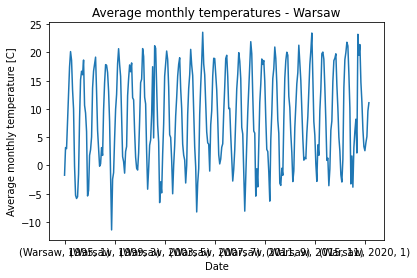

In [27]:
# Visualisation of the time series with average monthly temperatures for Warsaw (line plot)

warsaw.plot(y = 'Avg_temp_C', xlabel = 'Date', ylabel = 'Average monthly temperature [C]', title = 'Average monthly temperatures - Warsaw', legend = False)

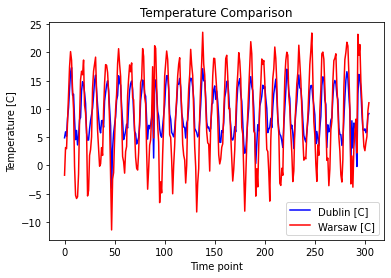

In [28]:
# Creating a plot containing the data originating from the two created data frames 'Warsaw' and 'Dublin'
# Goal: comparative analysis of the average monthly temperature values over the years

dublin_temperature = dublin['Avg_temp_C'].values
warsaw_temperature = warsaw['Avg_temp_C'].values

plt.plot(dublin_temperature, label='Dublin [C]', color='blue')
plt.plot(warsaw_temperature, label='Warsaw [C]', color='red')

plt.title('Temperature Comparison')
plt.xlabel('Time point')
plt.ylabel('Temperature [C]')
plt.legend()

plt.show()

In [29]:
# Using the 'concat' function to merge the created data frames ('Warsaw' and 'Dublin') into a single data frame 'merged_df'

merged_df = pd.concat([warsaw, dublin])
merged_df

Avg_temp_F  Avg_temp_C
City   Year Month                        
Warsaw 1995 1       28.883871   -1.731183
            2       37.685714    3.158730
            3       37.345161    2.969534
            4       46.106667    7.837037
            5       54.838710   12.688172
...                       ...         ...
Dublin 2020 1       43.651613    6.473118
            2       42.420690    5.789272
            3       43.022581    6.123656
            4       47.896667    8.831481
            5       48.538462    9.188034

[610 rows x 2 columns]

In [30]:
# Summary of the 'merged_df' data frame for the columns containing temperature values

merged_df.describe()

,Avg_temp_F,Avg_temp_C
count,610.000000,610.000000
mean,48.365593,9.091996
std,11.439915,6.355508
min,11.458065,-11.412186
25%,41.078214,5.043452
50%,47.981667,8.878704
75%,57.370565,14.094758
max,74.422581,23.568100
